# Pre-Processing numerical data for machine learning tasks
## House Price Prediction

**Pre-processing of the data which involve the details of Houses and its Area along with other considerable amenities that to buy house. This molde would be capable to provide the right value of any house with the same area.**

## Import Libraries

New Enviorment was created into Anaconda and required libraries were installed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data acquired from Kaggle.com
**The data is related to house prices of 1460 houses. The regression goal is to predict the house price of houses from test data.**



In [22]:
df_train = pd.read_csv('../ex/House price prediction/train.csv')

## information check

**No. of columns** = 80

**No. of Rows**  = 1460

**Data types** = float64(3), int64(35), object(43)

**Missing data** = True

**Dependent variable** = 'SalePrice'

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Columns: 1296 entries, Id to SaleCondition_Partial
dtypes: float64(1247), int64(1), object(48)
memory usage: 14.2+ MB


**Data consists of NA value with two meanings.**

**NA** - Not Applicable ( Catagorical type)

**NA** - Not Available ( Missing Value)

A dictionary created for column names and type of NA in the data.

In [20]:
d1 = {'MSSubClass':['','NA'],'MSZoning':['','NA'],'LotFrontage':['','NA'],'LotArea':['','NA'],'Street':['','NA'],'Alley':[''],'LotShape':['','NA'],'LandContour':['','NA'],'Utilities':['','NA'],'LotConfig':['','NA'],'LandSlope':['','NA'],'Neighborhood':['','NA'],'Condition1':['','NA'],'Condition2':['','NA'],'BldgType':['','NA'],'HouseStyle':['','NA'],'OverallQual':['','NA'],'OverallCond':['','NA'],'YearBuilt':['','NA'],'YearRemodAdd':['','NA'],'RoofStyle':['','NA'],'RoofMatl':['','NA'],'Exterior1st':['','NA'],'Exterior2nd':['','NA'],'MasVnrType':['','NA'],'MasVnrArea':['','NA'],'ExterQual':['','NA'],'ExterCond':['','NA'],'Foundation':['','NA'],'BsmtQual':[''],'BsmtCond':[''],'BsmtExposure':[''],'BsmtFinType1':[''],'BsmtFinSF1':['','NA'],'BsmtFinType2':[''],'BsmtFinSF2':['','NA'],'BsmtUnfSF':['','NA'],'TotalBsmtSF':['','NA'],'Heating':['','NA'],'HeatingQC':['','NA'],'CentralAir':['','NA'],'Electrical':['','NA'],'1stFlrSF':['','NA'],'2ndFlrSF':['','NA'],'LowQualFinSF':['','NA'],'GrLivArea':['','NA'],'BsmtFullBath':['','NA'],'BsmtHalfBath':['','NA'],'FullBath':['','NA'],'HalfBath':['','NA'],'KitchenQual':['','NA'],'BedroomAbvGr':['','NA'],'KitchenAbvGr':['','NA'],'TotRmsAbvGrd':['','NA'],'Functional':['','NA'],'Fireplaces':['','NA'],'FireplaceQu':[''],'GarageYrBlt':['','NA'],'GarageFinish':[''],'GarageCars':['','NA'],'GarageArea':['','NA'],'GarageQual':[''],'GarageCond':[''],'GarageType':[''],'PavedDrive':['','NA'],'WoodDeckSF':['','NA'],'OpenPorchSF':['','NA'],'EnclosedPorch':['','NA'],'3SsnPorch':['','NA'],'ScreenPorch':['','NA'],'PoolArea':['','NA'],'PoolQC':[''],'Fence':[''],'MiscFeature':[''],'MiscVal':['','NA'],'MoSold':['','NA'],'YrSold':['','NA'],'SaleType':['','NA'],'SaleCondition':['','NA']}
len(d1)

79

## Outlier handling Visualization.

{'whiskers': [<matplotlib.lines.Line2D at 0x20fcb1a08d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20fcb037710>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fc8fe2d50>],
 'medians': [<matplotlib.lines.Line2D at 0x20fc935d150>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fcb051050>],
 'means': []}

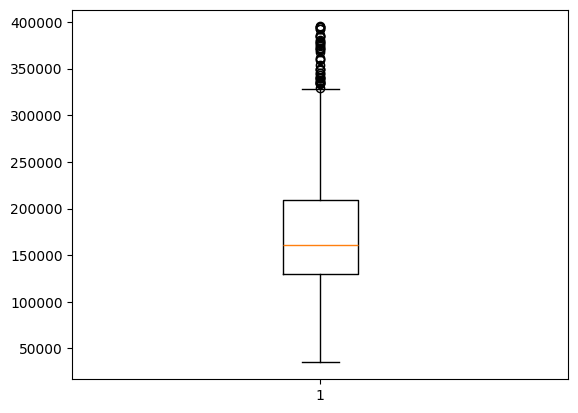

In [19]:
plt.boxplot(df_train['SalePrice'])

In [6]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Training data without outliers

In [7]:
df_train  = df_train[df_train["SalePrice"] <= 400000].reset_index(drop=True)

## Catagorical and Numerical columns list as pre-processing pre-requsite

In [8]:
column_cat = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
column_num = ['Id','LotFrontage','LotArea','YearBuilt','YearRemodAdd','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

## Imputer [Feature Engineering] Missing value handling

In [9]:
from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy='median')
imputer_num.fit(df_train[column_num])
df_train[column_num] = imputer_num.transform(df_train[column_num])

imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_cat.fit(df_train[column_cat])
df_train[column_cat] = imputer_cat.transform(df_train[column_cat])


## Encoding [Feature Engineering]

In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(df_train[column_cat])
columns_enc = list(encoder.get_feature_names_out())
df_train[columns_enc] = encoder.transform(df_train[column_cat])


## Scaling [Feature Engineering]

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train[column_num])
df_train[column_num] = scaler.transform(df_train[column_num])

In [13]:
final_columns = (column_num + columns_enc)

## Feature reduction using Principle Component Analysis [Feature Engineering] 

**Maintaining 98% of training data.**

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.98)
pca.fit(df_train[final_columns])
pca.n_components_

202

In [15]:
X_train = pca.transform(df_train[final_columns])
y_train = df_train['SalePrice']

## Test Data import and Handling

In [16]:
df_test = pd.read_csv('../ex/House price prediction/test.csv')

## Test Data Pre-processing

In [24]:
df_test[column_num] = imputer_num.transform(df_test[column_num])
df_test[column_cat] = imputer_cat.transform(df_test[column_cat])
df_test[columns_enc] = encoder.transform(df_test[column_cat])
df_test[column_num] = scaler.transform(df_test[column_num])
X_test = pca.transform(df_test[final_columns])